# Diffusion Model Practice Notebook

This notebook provides a professional workflow for learning and practicing diffusion models from scratch. It covers data loading, preprocessing, model definition, training, sampling, and evaluation.

## 1. Import Required Libraries
Import essential libraries such as numpy, pandas, matplotlib, torch, and any diffusion model utilities.

In [2]:
# Import Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
# If you have custom diffusion utilities, import them here
# from diffusion_utils import *

## 2. Load and Visualize Dataset
Load the dataset relevant to diffusion model practice and visualize sample data points to understand its structure.

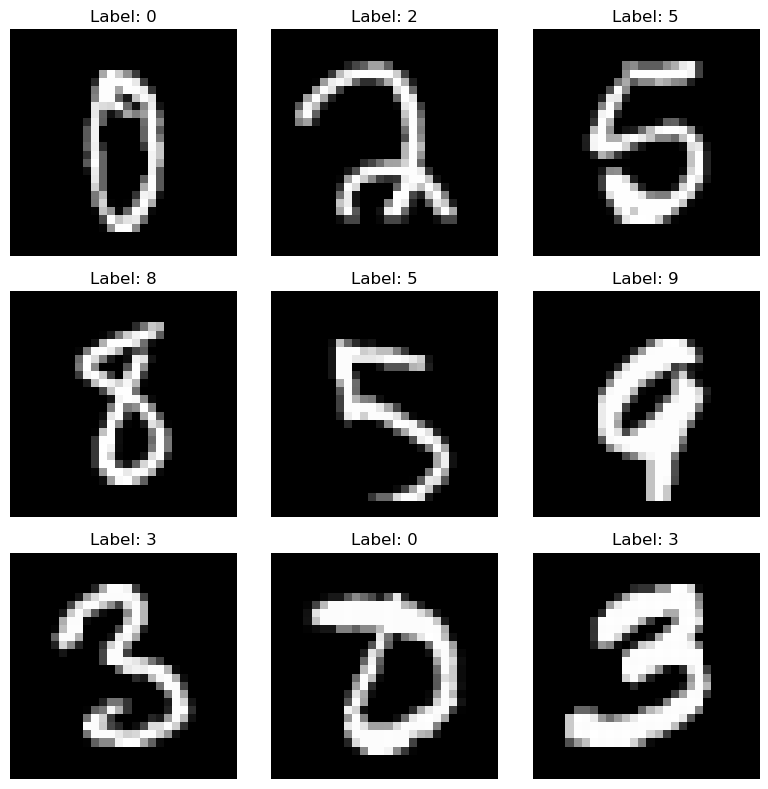

In [3]:
# Load and Visualize Dataset
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
dataloader = DataLoader(dataset, batch_size=64, shuffle=True)

# Visualize some sample images
examples = enumerate(dataloader)
batch_idx, (example_data, example_targets) = next(examples)
plt.figure(figsize=(8, 8))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(example_data[i][0], cmap='gray')
    plt.title(f"Label: {example_targets[i].item()}")
    plt.axis('off')
plt.tight_layout()
plt.show()

## 3. Preprocess Data for Diffusion Model
Apply necessary preprocessing steps such as normalization, reshaping, and splitting the data for training and testing.

In [4]:
# Preprocess Data for Diffusion Model
from sklearn.model_selection import train_test_split

# Flatten images for simple models (if needed)
X = example_data.view(example_data.size(0), -1).numpy()
y = example_targets.numpy()

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")

Training set shape: (51, 784)
Test set shape: (13, 784)


## 4. Define Diffusion Model Architecture
Implement the architecture of the diffusion model using PyTorch, including forward and reverse diffusion processes.

In [13]:
# Define Diffusion Model Architecture
class SimpleDiffusionModel(nn.Module):
    def __init__(self, input_dim, hidden_dim):
        super(SimpleDiffusionModel, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, hidden_dim // 2),
            nn.ReLU(),
            nn.Linear(hidden_dim // 2, input_dim)
        )
    def forward(self, x):
        return self.net(x)

# Example usage
input_dim = X_train.shape[1]
hidden_dim = 128
model = SimpleDiffusionModel(input_dim, hidden_dim)
print(model)

SimpleDiffusionModel(
  (net): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=784, bias=True)
  )
)


## 5. Train the Diffusion Model
Set up the training loop, define loss functions, and train the diffusion model on the preprocessed dataset.

In [47]:
# Train the Diffusion Model
num_epochs = 25
learning_rate = 1e-3
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

for epoch in range(num_epochs):
    model.train()
    inputs = torch.tensor(X_train, dtype=torch.float32)
    targets = inputs  # For denoising autoencoder setup
    outputs = model(inputs)
    loss = criterion(outputs, targets)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")

Epoch [1/25], Loss: 0.0243
Epoch [2/25], Loss: 0.0466
Epoch [3/25], Loss: 0.0303
Epoch [4/25], Loss: 0.0315
Epoch [5/25], Loss: 0.0328
Epoch [6/25], Loss: 0.0319
Epoch [7/25], Loss: 0.0292
Epoch [8/25], Loss: 0.0267
Epoch [9/25], Loss: 0.0259
Epoch [10/25], Loss: 0.0270
Epoch [11/25], Loss: 0.0280
Epoch [12/25], Loss: 0.0276
Epoch [13/25], Loss: 0.0261
Epoch [14/25], Loss: 0.0249
Epoch [15/25], Loss: 0.0247
Epoch [16/25], Loss: 0.0250
Epoch [17/25], Loss: 0.0252
Epoch [18/25], Loss: 0.0251
Epoch [19/25], Loss: 0.0248
Epoch [20/25], Loss: 0.0244
Epoch [21/25], Loss: 0.0240
Epoch [22/25], Loss: 0.0238
Epoch [23/25], Loss: 0.0238
Epoch [24/25], Loss: 0.0239
Epoch [25/25], Loss: 0.0238


## 6. Generate Samples Using the Trained Model
Use the trained diffusion model to generate new samples and visualize the results.

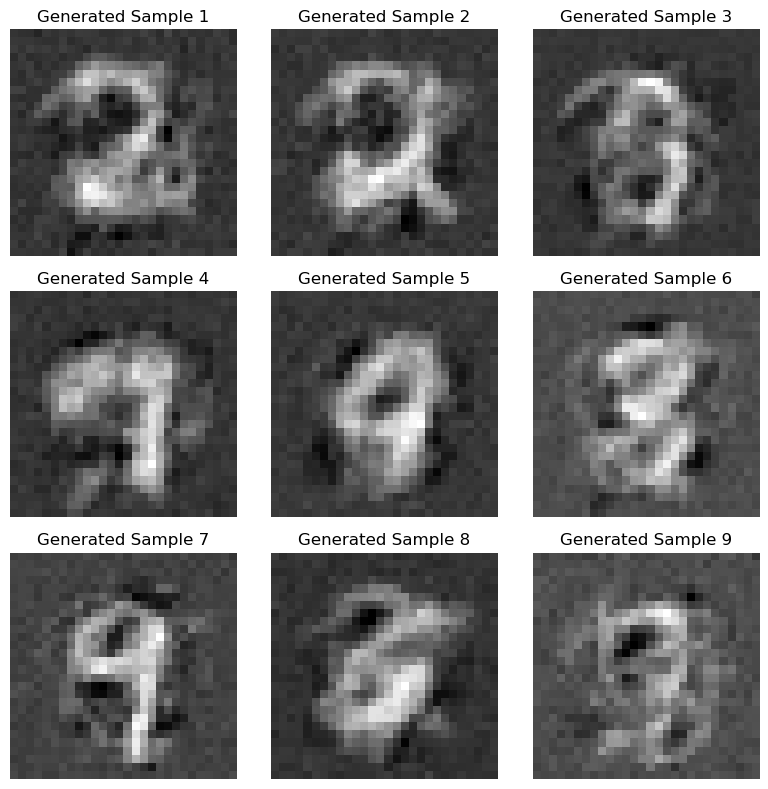

In [48]:
# Generate Samples Using the Trained Model
model.eval()
with torch.no_grad():
    test_inputs = torch.tensor(X_test, dtype=torch.float32)
    generated = model(test_inputs)

# Visualize generated samples
plt.figure(figsize=(8, 8))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(generated[i].view(28, 28), cmap='gray')
    plt.title(f"Generated Sample {i+1}")
    plt.axis('off')
plt.tight_layout()
plt.show()

## 7. Evaluate Model Performance
Assess the performance of the diffusion model using appropriate metrics and visualizations.

Test MSE: 0.1669


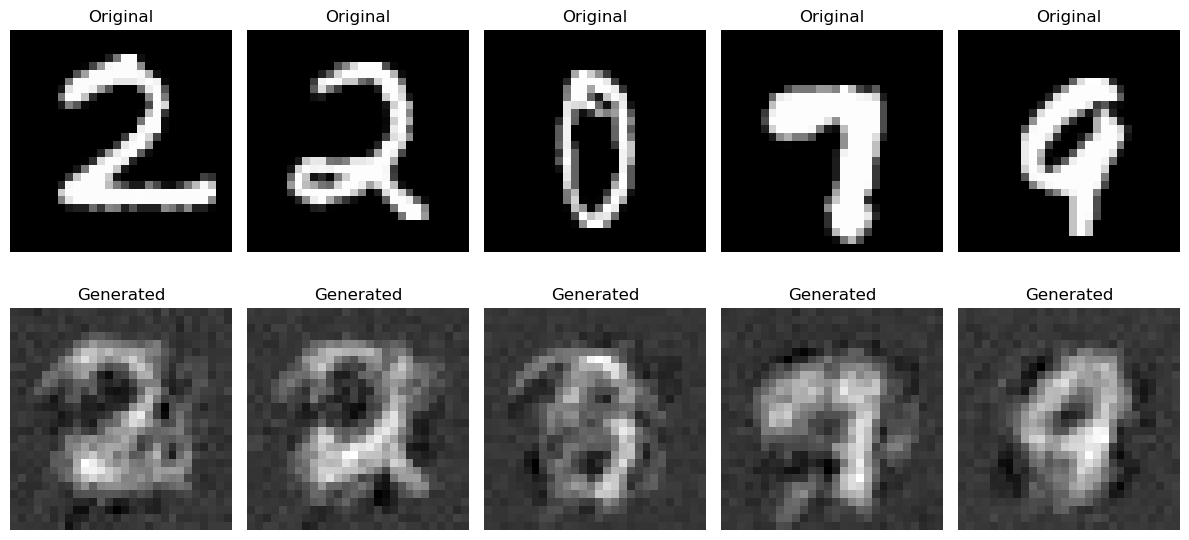

In [49]:
# Evaluate Model Performance
from sklearn.metrics import mean_squared_error

model.eval()
with torch.no_grad():
    test_inputs = torch.tensor(X_test, dtype=torch.float32)
    generated = model(test_inputs)
    mse = mean_squared_error(X_test, generated.numpy())
    print(f"Test MSE: {mse:.4f}")

# Visualize some original vs generated samples
plt.figure(figsize=(12, 6))
for i in range(5):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
    plt.title("Original")
    plt.axis('off')
    plt.subplot(2, 5, i+6)
    plt.imshow(generated[i].view(28, 28), cmap='gray')
    plt.title("Generated")
    plt.axis('off')
plt.tight_layout()
plt.show()